In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from glob import glob

In [2]:
target = ['YL_M1_B1_W1','YR_M1_B1_W1','YL_M1_B1_W2','YR_M1_B1_W2']

In [3]:
data_path = glob('./data/*.csv')
data_path = [ './data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
            './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

data_path

['./data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

In [4]:
pd.read_csv('./data/answer_sample.csv')

,Distance,YL_M1_B1_W1_s30,YR_M1_B1_W1_s30,YL_M1_B1_W2_s30,YR_M1_B1_W2_s30,YL_M1_B1_W1_s40,YR_M1_B1_W1_s40,YL_M1_B1_W2_s40,YR_M1_B1_W2_s40,YL_M1_B1_W1_s50,...,YL_M1_B1_W2_c50,YR_M1_B1_W2_c50,YL_M1_B1_W1_c70,YR_M1_B1_W1_c70,YL_M1_B1_W2_c70,YR_M1_B1_W2_c70,YL_M1_B1_W1_c100,YR_M1_B1_W1_c100,YL_M1_B1_W2_c100,YR_M1_B1_W2_c100
0,2500.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2500.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2501.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2501.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2998.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,2999.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,2999.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,2999.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.read_csv('./data\\lane_data_c.csv')

,Distance,Curvature,Vertical offset,Cross level offset
0,0.00,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0
2,0.50,0.0,0.0,0.0
3,0.75,0.0,0.0,0.0
4,1.00,0.0,0.0,0.0
...,...,...,...,...
11995,2998.75,0.0,0.0,0.0
11996,2999.00,0.0,0.0,0.0
11997,2999.25,0.0,0.0,0.0
11998,2999.50,0.0,0.0,0.0


In [6]:
data_path = [
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_c100.csv']
data_c = [pd.merge(pd.read_csv('./data\\lane_data_c.csv',),pd.read_csv(i)) for i in data_path]
# data_c = [pd.read_csv(i) for i in data_path]

# tar = data_c[0]
# for i in tar.columns:
#     plt.title(i)
#     tar[i].plot()
#     plt.show()

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data_s = [pd.merge(pd.read_csv('./data\\lane_data_s.csv',),pd.read_csv(i)) for i in data_path]
# data_s = [pd.read_csv(i) for i in data_path]

In [7]:
tp = [('YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2')]

In [22]:
data_s[0]

,Distance,Cross level,Curvature,Lateral,Vertical,Gauge,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,...,QL_M1_B1_W1,QR_M1_B1_W1,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
0,0.00,0.081,0.002,1.308,1.155,0.345,-1.273400e-09,-1.943500e-08,0.022194,0.022194,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
1,0.25,0.251,0.002,1.282,1.157,0.151,1.485600e-05,3.403000e-06,0.161500,0.159800,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
2,0.50,0.421,0.002,1.256,1.159,-0.043,2.706500e-04,5.112900e-05,0.579500,0.569500,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
3,0.75,0.416,0.002,1.297,0.858,0.033,1.247900e-03,1.295900e-04,0.812000,0.789500,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
4,1.00,0.412,0.002,1.337,0.558,0.110,3.080900e-03,-1.466900e-03,0.383100,0.349700,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2998.75,-0.639,-0.002,0.295,-0.503,-0.477,9.026600e-02,8.505400e-02,-1.096000,-1.012000,...,0.213100,0.103000,-9.184000,-17.920000,-0.138000,-0.263100,0.000000,0.000000,0.000000,0.000000
11996,2999.00,-0.827,-0.002,0.299,-0.785,-0.218,1.043000e-01,9.336100e-02,-0.938800,0.048887,...,0.154200,0.051614,-8.026000,-22.840000,-0.120600,-0.335400,0.000000,0.000000,0.000000,0.000000
11997,2999.25,-0.861,-0.001,0.116,-0.931,-0.048,1.151000e-01,7.851500e-02,-0.405400,1.249000,...,0.098817,0.148900,-10.770000,-30.400000,-0.161800,-0.446400,0.000000,0.000000,0.000000,0.000000
11998,2999.50,-0.894,0.000,-0.068,-1.077,0.122,1.239000e-01,4.084100e-02,-0.312900,1.486000,...,0.001088,0.152100,-16.290000,-34.690000,-0.244800,-0.509500,0.000000,0.000000,0.000000,0.000000


In [16]:
data_c[0]

,Distance,Curvature,Vertical offset,Cross level offset,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,A_M1_B1_W2_Y_L,A_M1_B1_W1_Y_R,...,QL_M1_B1_W1,QR_M1_B1_W1,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
0,0.00,0.0,0.0,0.0,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
1,0.25,0.0,0.0,0.0,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
2,0.50,0.0,0.0,0.0,2.706500e-04,5.112900e-05,0.579500,0.569500,0.559500,0.579500,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
3,0.75,0.0,0.0,0.0,1.247900e-03,1.295900e-04,0.812000,0.789500,0.767100,0.811800,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
4,1.00,0.0,0.0,0.0,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2998.75,0.0,0.0,0.0,8.982300e-02,8.510300e-02,-1.100000,-1.016000,-0.931900,-1.102000,...,0.213300,0.102600,-9.153000,-17.960000,-0.137500,-0.263800,0.000000,0.000000,0.000000,0.000000
11996,2999.00,0.0,0.0,0.0,1.039000e-01,9.337700e-02,-0.937900,0.046609,1.031000,-0.938500,...,0.154400,0.051214,-7.990000,-22.870000,-0.120000,-0.335900,0.000000,0.000000,0.000000,0.000000
11997,2999.25,0.0,0.0,0.0,1.147000e-01,7.847700e-02,-0.403500,1.246000,2.896000,-0.403100,...,0.099015,0.148700,-10.750000,-30.460000,-0.161600,-0.447300,0.000000,0.000000,0.000000,0.000000
11998,2999.50,0.0,0.0,0.0,1.234000e-01,4.075700e-02,-0.313900,1.483000,3.280000,-0.312900,...,0.001208,0.151700,-16.270000,-34.710000,-0.244400,-0.509800,0.000000,0.000000,0.000000,0.000000


In [24]:
pd.read_csv('./data/data_columns.csv')

,name,description
0,Distance,거리[m]
1,A_M1_C_B1_Y,대차상부 차체 횡가속도[m/s^2]
2,A_M1_C_B1_Z,대차상부 차체 수직가속도[m/s^2]
3,A_M1_B1_W1_Y_L,좌측 전위 대차 프레임 횡가속도[m/s^2]
4,A_M1_B1_BC_Y_L,좌측 중앙 대차 프레임 횡가속도[m/s^2]
5,A_M1_B1_W2_Y_L,좌측 후위 대차 프레임 횡가속도[m/s^2]
6,A_M1_B1_W1_Y_R,우측 전위 대차 프레임 횡가속도[m/s^2]
7,A_M1_B1_BC_Y_R,우측 중앙 대차 프레임 횡가속도[m/s^2]
8,A_M1_B1_W2_Y_R,우측 후위 대차 프레임 횡가속도[m/s^2]
9,A_M1_B1_W1_Z_L,좌측 전위 대차 프레임 수직가속도[m/s^2]


In [26]:
target_ = ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']
droping = [('YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'), # x
      ('YL_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2')]
droping = [list(i) for i in droping]
best_ = []

In [51]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
data = kernel_pca.fit_transform(data_c[0].drop(droping[0],axis=1))

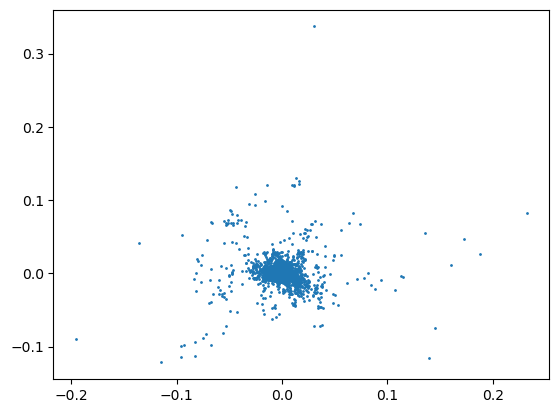

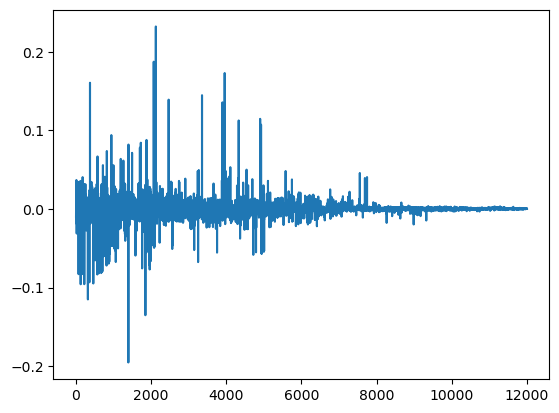

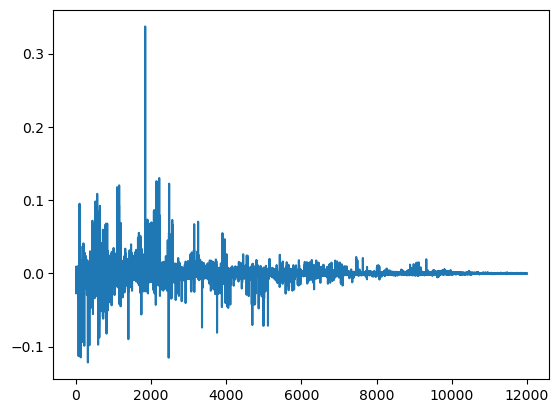

In [56]:
data = pd.DataFrame(data,columns=['x','y'])
plt.scatter(data=data,x='x',y='y',s=1)
plt.show()
plt.plot(data.x)
plt.show()
plt.plot(data.y)
plt.show()

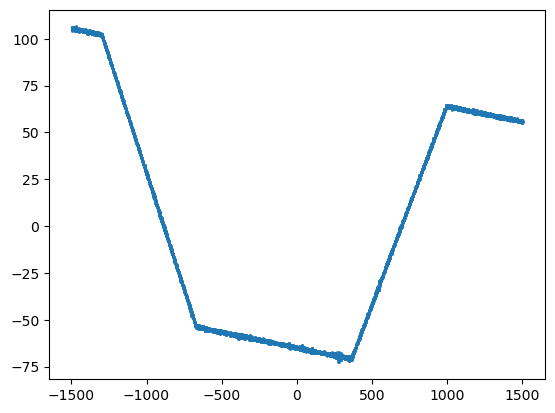

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(data_c[3].drop(droping[0],axis=1)),columns=['x','y'])
plt.scatter(data=data,x='x',y='y',s=1)

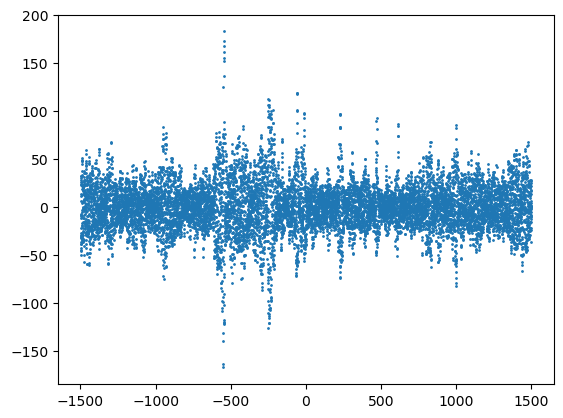

In [46]:
from sklearn.decomposition import PCA
idx = 2
pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(data_s[0].drop(droping[idx],axis=1)),columns=['x','y'])
plt.scatter(data=data,x='x',y='y',s=1)

In [86]:
data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data = pd.DataFrame()
for i in range(len(data_s)):
    data = pd.concat([data,pd.read_csv(data_path[i]).iloc[:,1:31]],axis=1)
data.columns = [f's_{i}' for i in range(150)]
data

,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_140,s_141,s_142,s_143,s_144,s_145,s_146,s_147,s_148,s_149
0,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,0.022194,0.022194,-0.055737,-0.055737,...,33.410,-0.085212,-20.360000,24.150,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012
1,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,0.159800,0.158200,-0.369500,-0.384500,...,6.927,-0.040134,-5.737000,6.022,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191
2,2.706500e-04,5.112900e-05,0.579500,0.569500,0.559500,0.579500,0.569500,0.559500,-1.329000,-1.366000,...,2.705,0.216600,-5.695000,5.640,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149
3,1.247900e-03,1.295900e-04,0.812000,0.789500,0.767100,0.811800,0.789300,0.766900,-2.511000,-2.166000,...,-19.860,0.700500,-16.600000,-12.780,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261
4,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,0.349300,0.315900,-5.545000,-2.892000,...,-19.170,0.882800,-19.260000,-18.270,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,9.026600e-02,8.505400e-02,-1.096000,-1.012000,-0.927300,-1.098000,-1.014000,-0.929000,10.430000,5.617000,...,4.999,-6.857000,14.140000,7.241,0.212500,0.106400,-8.669000,-18.450000,-0.130200,-0.270900
11996,1.043000e-01,9.336100e-02,-0.938800,0.048887,1.037000,-0.939500,0.048170,1.036000,5.924000,-0.865000,...,1.163,-13.000000,10.200000,3.658,0.153200,0.053737,-7.556000,-23.300000,-0.113500,-0.342100
11997,1.151000e-01,7.851500e-02,-0.405400,1.249000,2.902000,-0.404900,1.249000,2.903000,0.466600,-5.933000,...,10.260,-26.710000,6.583000,10.190,0.098914,0.149600,-10.400000,-30.810000,-0.156300,-0.452500
11998,1.239000e-01,4.084100e-02,-0.312900,1.486000,3.285000,-0.311900,1.487000,3.286000,-0.784600,-5.954000,...,10.200,-32.210000,0.097591,10.300,0.001466,0.151300,-16.030000,-34.930000,-0.240800,-0.513000


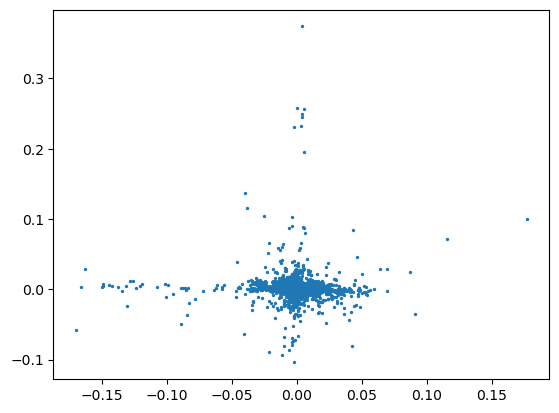

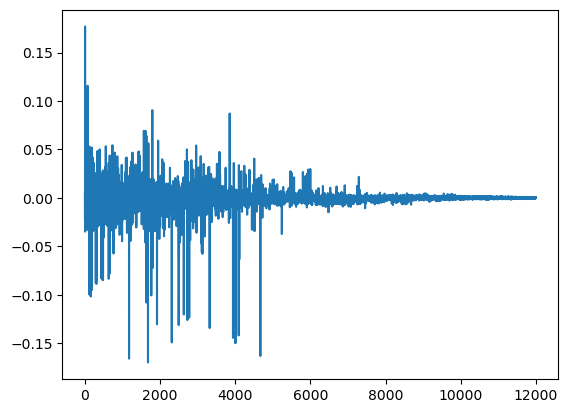

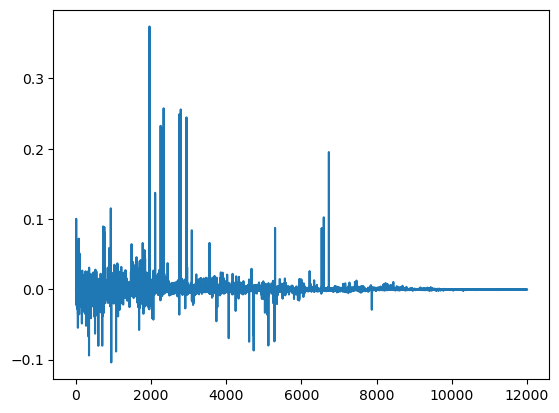

In [91]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
tp = kernel_pca.fit_transform(data)
tp_d = pd.DataFrame(tp,columns=['x','y'])
plt.scatter(data=tp_d,x='x',y='y',s=2)
plt.show()
plt.plot(tp_d.x)
plt.show()
plt.plot(tp_d.y)
plt.show()

In [100]:
tp_d[:10000][(tp_d['x'] < 0.01) & (tp_d['x'] > -0.01) & (tp_d['y'] < 0.01) & (tp_d['y'] > -0.01)].index

Int64Index([   0,    1,    2,    4,    6,    7,    9,   11,   13,   14,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=8898)

In [79]:
cat = CatBoostRegressor(n_estimators=10000,depth=8,random_seed=44,verbose=2000,loss_function='MAPE')
cat.fit(data.loc[:10000,:],data_s[0].loc[:10000,'YL_M1_B1_W1'])

0:	learn: 0.0142962	total: 167ms	remaining: 27m 47s
2000:	learn: 0.0025288	total: 4m 37s	remaining: 18m 30s
4000:	learn: 0.0020032	total: 9m 18s	remaining: 13m 57s
6000:	learn: 0.0017455	total: 14m 1s	remaining: 9m 20s
8000:	learn: 0.0015793	total: 16m 21s	remaining: 4m 5s
9999:	learn: 0.0014618	total: 17m 52s	remaining: 0us


In [84]:
ans = pd.read_csv('./data/answer_sample.csv')
ans['YL_M1_B1_W1_s30'] = cat.predict(data.loc[10001:,:])
ans = ans.set_index('Distance')
ans.to_csv('./ans.csv')